In [71]:
#To make these codes to work apply these:
#Enter to channels from Anaconda Navigator. Add "www.conda.anaconda.org".
#Run Anaconda Power Shell as admin.
#Download python3 and pip (if you have them already,no need to re-download).
#Download tensorflow library with "pip install tensorflow" command in Anaconda Power Shell.
#Download the keras library with "pip install keras" command in Anaconda Power Shell.

In [73]:
#The problem:
#Build an ANN structure by using MNIST train data to predict the MNIST handwritten digits.
#You will use MNIST test data to evaluate your trained ANN structure in terms of 
#evaluation metrics that are accuracy and F1 score.
#Train your ANN structure with activation functions that are sigmoid, ReLU, and tanh separately.
#Use the same activation functions in hidden layer and output layer for your ANN structure. 
#Add the convergence curve of your ANN structure along iterations.
#Explain your ANN structure in terms of the included number of neurons in hidden layer and output layer.
#Explain which value of learning rate is used for your ANN structure.
#Explain which activation function provides the highest or the lowest classification performance

In [52]:
#Keras is used for quickly experimenting with deep neural networks
import numpy as np #For matrix operations
import matplotlib.pyplot as plt #For plotting to the screen
from keras.layers import Dense, Flatten #For layers in our model
from keras.models import Sequential #For modeling ann
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist #We upload our csv train and test files from keras

In [53]:
# Load MNIST handwritten digit data from keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [54]:
# Convert y_train into one-hot format
#One-hot encoding: change the values as they are 
#either 1 or 0 to work with categorical data directly
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
    
y_train = np.array(temp)

In [55]:
# Convert y_test into one-hot format 
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))

y_test = np.array(temp)

In [56]:
#We will create 3 different models seperately
# with using sigmoid,ReLu and tanh functions
#to compare each one of them with others

#For Sigmoid
# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

model.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 3925      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [57]:
#For Sigmoid
# Train the Neural Network model
history_sigmoid = model.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))
#Our model works for 5 times and sets its values by backpropagation

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9278 - acc: 0.4084 - val_loss: 1.2391 - val_acc: 0.6782
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 1.1220 - acc: 0.7034 - val_loss: 0.9345 - val_acc: 0.7332
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9069 - acc: 0.7365 - val_loss: 0.7882 - val_acc: 0.7715
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8214 - acc: 0.7529 - val_loss: 0.7798 - val_acc: 0.7566
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8096 - acc: 0.7506 - val_loss: 0.7519 - val_acc: 0.7725


In [58]:
#For Sigmoid
# Making predictions using our trained model
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

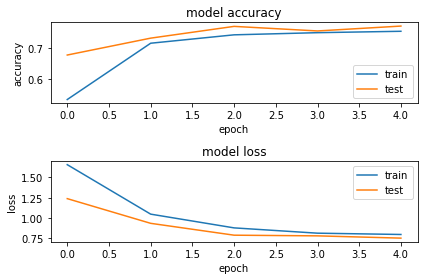

In [59]:
#For Sigmoid
# plotting the convergence curve
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_sigmoid.history['loss'])
plt.plot(history_sigmoid.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

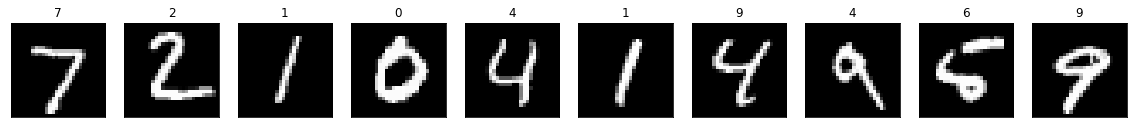

In [60]:
#For Sigmoid
# Display predictions on test data for
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

In [61]:
#For ReLu
# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(5, activation='relu'))
model.add(Dense(10, activation='relu'))

model.summary()

model.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 3925      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [62]:
#For ReLu
# Train the Neural Network model
history_relu = model.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))
#Our model works for 5 times and sets its values by backpropagation

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 3.4088 - acc: 0.3191 - val_loss: 1.5309 - val_acc: 0.6006
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 1.7275 - acc: 0.5748 - val_loss: 1.3685 - val_acc: 0.6337
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3457 - acc: 0.6817 - val_loss: 1.2623 - val_acc: 0.7493
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: nan - acc: 0.6772 - val_loss: nan - val_acc: 0.0980
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: nan - acc: 0.0974 - val_loss: nan - val_acc: 0.0980


In [63]:
#For ReLu
# Making predictions using our trained model
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

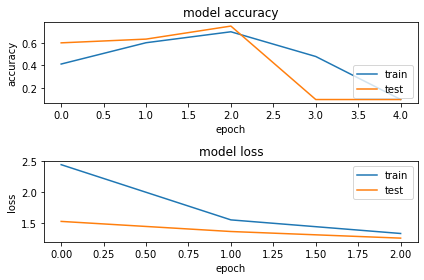

In [64]:
#For ReLu
# plotting the convergence curve
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_relu.history['acc'])
plt.plot(history_relu.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_relu.history['loss'])
plt.plot(history_relu.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

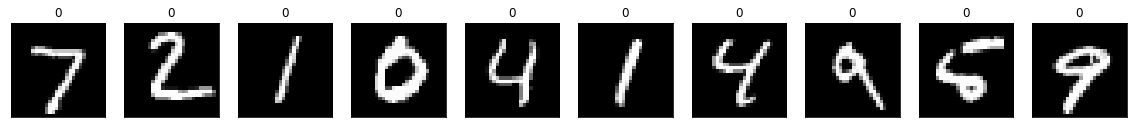

In [65]:
#For ReLu
# Display predictions on test data for
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

In [66]:
#For tanh
# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(5, activation='tanh'))
model.add(Dense(10, activation='tanh'))

model.summary()

model.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 3925      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [67]:
#For tanh
# Train the Neural Network model
history_tanh = model.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))
#Our model works for 5 times and sets its values by backpropagation

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 9.3224 - acc: 0.1175 - val_loss: 7.2621 - val_acc: 0.1165
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 8.2193 - acc: 0.1083 - val_loss: 7.9319 - val_acc: 0.1062
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 8.0157 - acc: 0.1093 - val_loss: 7.9286 - val_acc: 0.1061
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 8.0199 - acc: 0.1070 - val_loss: 7.9349 - val_acc: 0.1061
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 8.0102 - acc: 0.1054 - val_loss: 7.9301 - val_acc: 0.1061


In [68]:
#For tanh
# Making predictions using our trained model
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

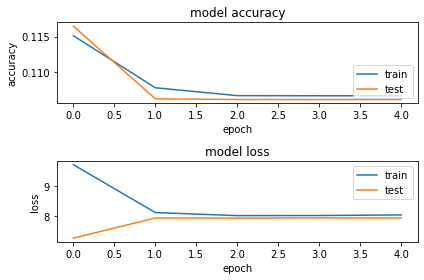

In [69]:
#For tanh
# plotting the convergence curve
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_tanh.history['acc'])
plt.plot(history_tanh.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_tanh.history['loss'])
plt.plot(history_tanh.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

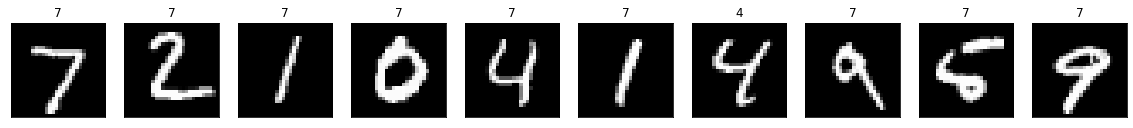

In [70]:
#For ReLu
# Display predictions on test data for
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
#Summary:

#tanh is superior than sigmoid always. ReLu and tanh perform different depend on the model.
#ReLu is commonly prefered because it is lot easier to understand and apply especially for deep learning(multi layer ann).

#tanh is a logistic function. The range of the tanh function is from (-1 to 1).
#Advantage of the tanh : Negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero.
#The range of ReLu is from (0 to infinity).
#Advantage of the ReLu: Activation is sparse and efficient.
#It should only be used within Hidden layers of a Neural Network Model.

#In the model the learning rate a is 0,01 default value.
#